 # Import Libraries

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [30]:
data=pd.read_csv('india.csv')

In [3]:
data

,States/Uts,population(1901),population(1951),population(2011),population(2023),population(2024),Male(literacy rate),Female (literacy rate)Average (literacy rate),average (literacy rate),Area (sq. km),GDP,per capita in,sex ratio (number of female per male),Hindu,Muslim,Christian,Sikhs,Buddhist,Others,Majority
0,Andaman and Nicobar Islands,24649,30971,380581,403000,404000,90.11,81.84,86.27,8249,0.89,229000.0,1045,0.6945,0.0852,0.2128,0.0034,0.0009,0.0032,Hindu
1,Andhra Pradesh,13071874,20216637,49386799,53217000,53402000,73.40,59.50,66.40,162970,14.50,219518.0,963,0.9087,0.0733,0.0138,0.0002,0.0001,0.0039,Hindu
2,Arunachal Pradesh,-,-,1383727,1565000,1580000,73.69,59.57,66.95,83743,0.38,256410.0,997,0.2904,0.0195,0.3026,0.0024,0.1177,0.2674,Christian
3,Assam,3289680,8028856,31205576,35824000,36159000,90.10,81.20,85.90,78438,5.67,118504.0,1012,0.6147,0.3422,0.0374,0.0007,0.0018,0.0032,Hindu
4,Bihar,27311865,29085017,104099452,127368000,129205000,79.70,60.50,70.90,94163,8.59,54000.0,1090,0.8269,0.1687,0.0012,0.0002,0.0002,0.0028,Hindu
5,Chandigarh,21967,24261,1055450,1235000,1247000,90.54,81.38,86.43,114,0.49,333000.0,917,0.8078,0.0487,0.0011,0.1311,NaN,0.0113,Hindu
6,Chhattisgarh,4181554,7456706,25545198,30294000,30638000,85.40,68.70,77.30,135192,5.09,152348.0,1015,0.9325,0.0202,0.0192,0.0027,0.0028,0.0226,Hindu
7,Dadra & Nagar Haveli and Daman & Diu,56285,90143,586956,1293000,1387000,89.50,76.20,80.50,603,NaN,NaN,827,0.9393,0.0376,0.0149,0.0006,0.0018,0.0058,Hindu
8,Delhi,405819,1744072,16787941,21490000,21884000,93.70,82.40,88.70,1483,10.40,444768.0,913,0.8168,0.1286,0.0087,0.0340,0.0011,0.0108,Hindu
9,Goa,475513,547448,1458545,1577000,1585000,92.81,81.84,87.40,3702,1.00,527146.0,1027,0.6608,0.0833,0.2510,0.0010,0.0008,0.0031,Hindu


# DATA QUALITY CHAKES

In [31]:
def check_missing_values(data):
    missing_values = data.isnull().sum()
    print("Missing Values:\n", missing_values[missing_values > 0])
check_missing_values(data)

Missing Values:
 GDP              2
per capita in    2
Buddhist         1
dtype: int64


In [32]:
def check_duplicates(data):
    duplicates = data.duplicated().sum()
    print("Number of Duplicate Rows:", duplicates)
check_duplicates(data)

Number of Duplicate Rows: 0


In [10]:
# Check data types and convert if necessary
def check_data_types(data):
    print("Data Types:\n", data.dtypes)
check_data_types(data)

Data Types:
 States/Uts                                        object
population(1901)                                  object
population(1951)                                  object
population(2011)                                   int64
population(2023)                                   int64
population(2024)                                   int64
Male(literacy rate)                              float64
Female (literacy rate)Average (literacy rate)    float64
average (literacy rate)                          float64
Area (sq. km)                                      int64
GDP                                              float64
per capita in                                    float64
sex ratio (number of female per male)              int64
Hindu                                            float64
Muslim                                           float64
Christian                                        float64
Sikhs                                            float64
Buddhist          

In [33]:
def check_unique_values(data):
    categorical_columns = ['States/Uts', 'Majority']
    for col in categorical_columns:
        print(f"Unique values in {col}:\n", data[col].unique())
check_unique_values(data)

Unique values in States/Uts:
 ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh'
 'Dadra & Nagar Haveli and Daman & Diu' 'Delhi' 'Goa' 'Gujarat' 'Haryana'
 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala'
 'Lakshadweep' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttarakhand'
 'West Bengal']
Unique values in Majority:
 ['Hindu' 'Christian' 'Muslim' 'Sikh']


# Population Analysis

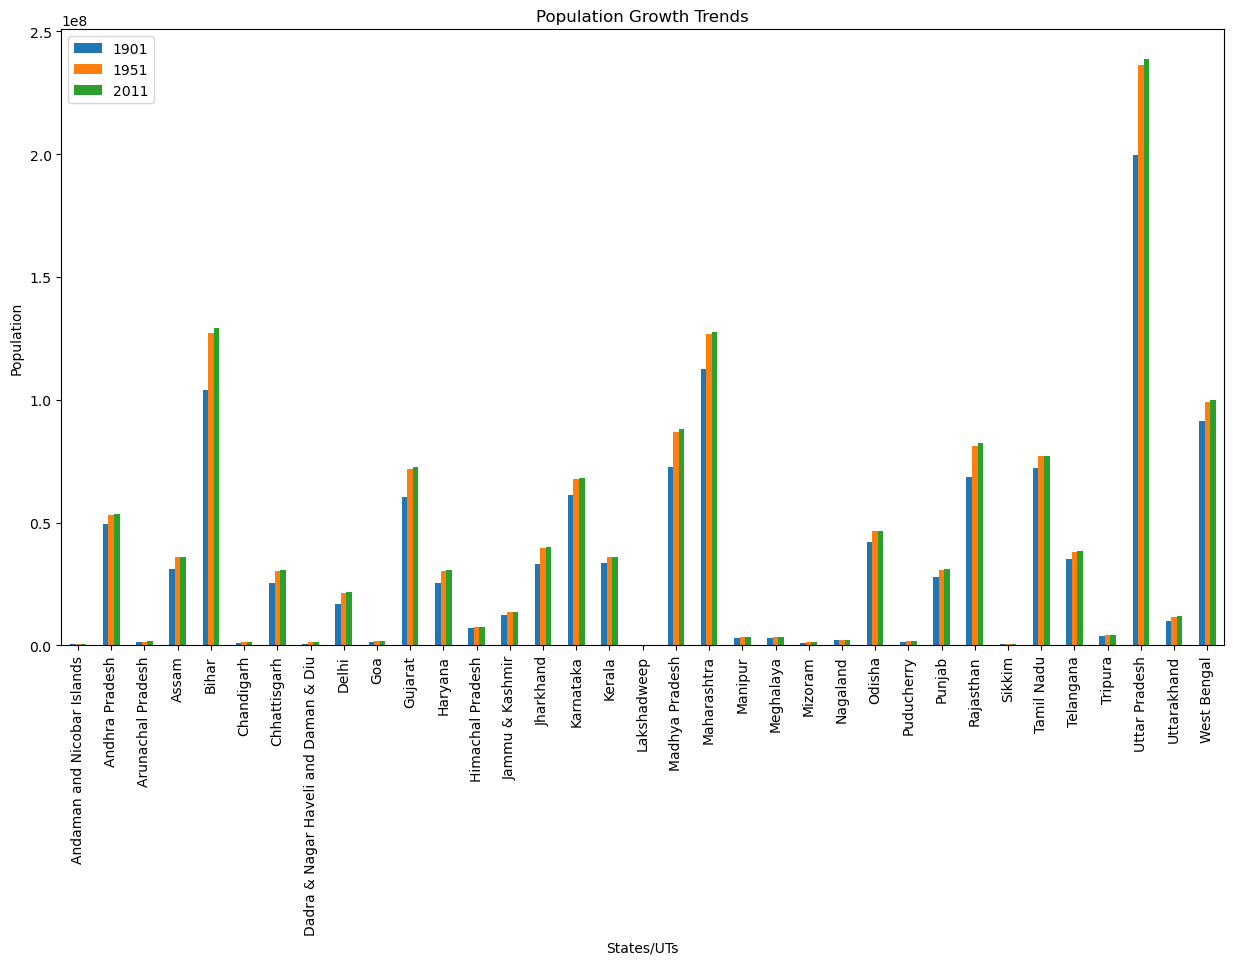

In [34]:
def population_growth_trends(data):
    data.set_index('States/Uts')[['population(1901)', 'population(1951)', 'population(2011)', 'population(2023)', 'population(2024)']].plot(kind='bar', figsize=(15, 8))
    plt.title('Population Growth Trends')
    plt.xlabel('States/UTs')
    plt.ylabel('Population')
    plt.legend(['1901', '1951', '2011', '2023', '2024'])
    plt.xticks(rotation=90)
    plt.show()

population_growth_trends(data)

# Population Density

def population_density(data):
    data['Density (2024)'] = data['population(2024)'] / data['Area (sq. km)']
    data.plot(x='States/Uts', y='Density (2024)', kind='bar', figsize=(15, 8))
    plt.title('Population Density (2024)')
    plt.xlabel('States/UTs')
    plt.ylabel('Density (per sq. km)')
    plt.xticks(rotation=90)
    plt.show()

population_density(data)

# Top and Bottom States by Population

In [16]:
def top_bottom_states_by_population(data):
    top_states = data.nlargest(5, 'population(2024)')
    bottom_states = data.nsmallest(5, 'population(2024)')
    
    top_bottom_df = pd.concat([
        top_states[['States/Uts', 'population(2024)']].rename(columns={'population(2024)': 'Population (2024)'}).assign(Category='Top 5 States'),
        bottom_states[['States/Uts', 'population(2024)']].rename(columns={'population(2024)': 'Population (2024)'}).assign(Category='Bottom 5 States')
    ])
    
    top_bottom_df = top_bottom_df.reset_index(drop=True)
    return top_bottom_df

top_bottom_df = top_bottom_states_by_population(data)
print(top_bottom_df)

                    States/Uts  Population (2024)         Category
0                Uttar Pradesh          238875000     Top 5 States
1                        Bihar          129205000     Top 5 States
2                  Maharashtra          127684000     Top 5 States
3                  West Bengal           99723000     Top 5 States
4               Madhya Pradesh           87954000     Top 5 States
5                  Lakshadweep              69000  Bottom 5 States
6  Andaman and Nicobar Islands             404000  Bottom 5 States
7                       Sikkim             697000  Bottom 5 States
8                   Chandigarh            1247000  Bottom 5 States
9                      Mizoram            1252000  Bottom 5 States


#Literacy Rate Analysis

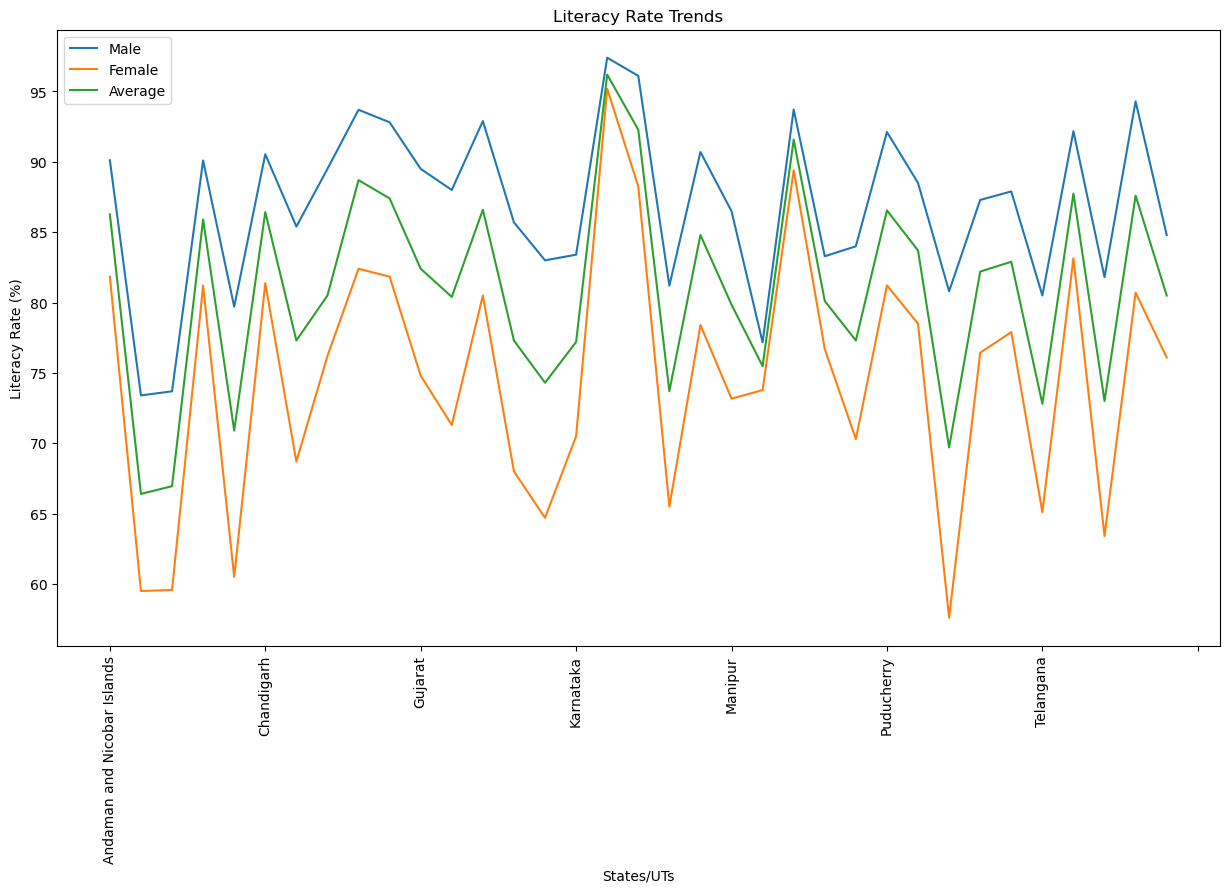

In [35]:
def literacy_rate_trends(data):
    data.plot(x='States/Uts', y=['Male(literacy rate)', 'Female (literacy rate)Average (literacy rate)', 'average (literacy rate)'], kind='line', figsize=(15, 8))
    plt.title('Literacy Rate Trends')
    plt.xlabel('States/UTs')
    plt.ylabel('Literacy Rate (%)')
    plt.legend(['Male', 'Female', 'Average'])
    plt.xticks(rotation=90)
    plt.show()

literacy_rate_trends(data)

# Gender Disparity in Literacy

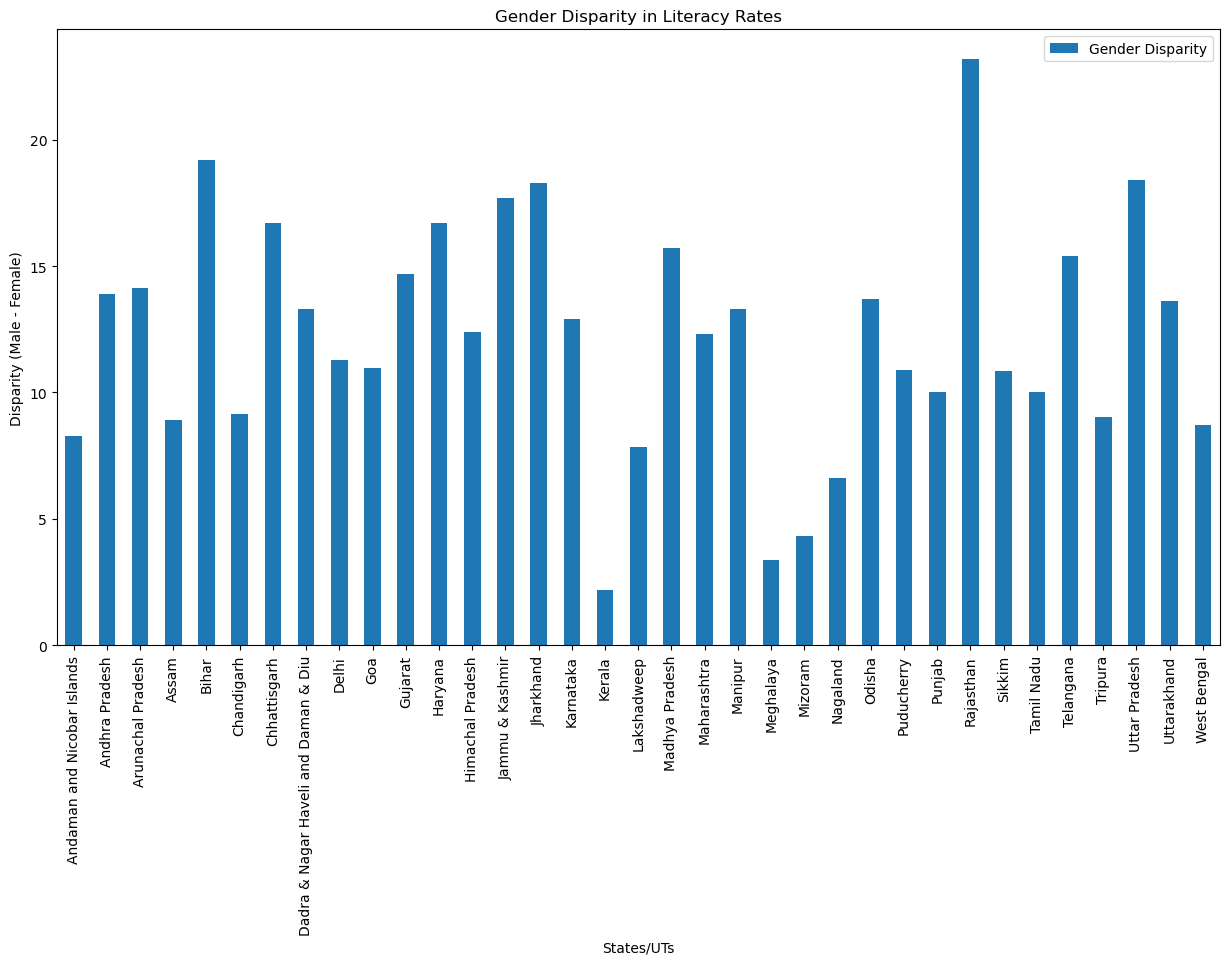

In [36]:
def gender_disparity_in_literacy(data):
    data['Gender Disparity'] = data['Male(literacy rate)'] - data['Female (literacy rate)Average (literacy rate)']
    data.plot(x='States/Uts', y='Gender Disparity', kind='bar', figsize=(15, 8))
    plt.title('Gender Disparity in Literacy Rates')
    plt.xlabel('States/UTs')
    plt.ylabel('Disparity (Male - Female)')
    plt.xticks(rotation=90)
    plt.show()

gender_disparity_in_literacy(data)


# Top and Bottom States by Literacy

In [37]:
def top_bottom_states_by_literacy(data):
    top_states = data.nlargest(5, 'average (literacy rate)')
    bottom_states = data.nsmallest(5, 'average (literacy rate)')
    print("Top 5 States by Literacy Rate:\n", top_states[['States/Uts', 'average (literacy rate)']])
    print("\nBottom 5 States by Literacy Rate:\n", bottom_states[['States/Uts', 'average (literacy rate)']])

top_bottom_states_by_literacy(data)

Top 5 States by Literacy Rate:
      States/Uts  average (literacy rate)
16       Kerala                    96.20
17  Lakshadweep                    92.28
22      Mizoram                    91.58
8         Delhi                    88.70
31      Tripura                    87.75

Bottom 5 States by Literacy Rate:
            States/Uts  average (literacy rate)
1      Andhra Pradesh                    66.40
2   Arunachal Pradesh                    66.95
27          Rajasthan                    69.70
4               Bihar                    70.90
30          Telangana                    72.80


#ECONOMICAL ANALYSIS

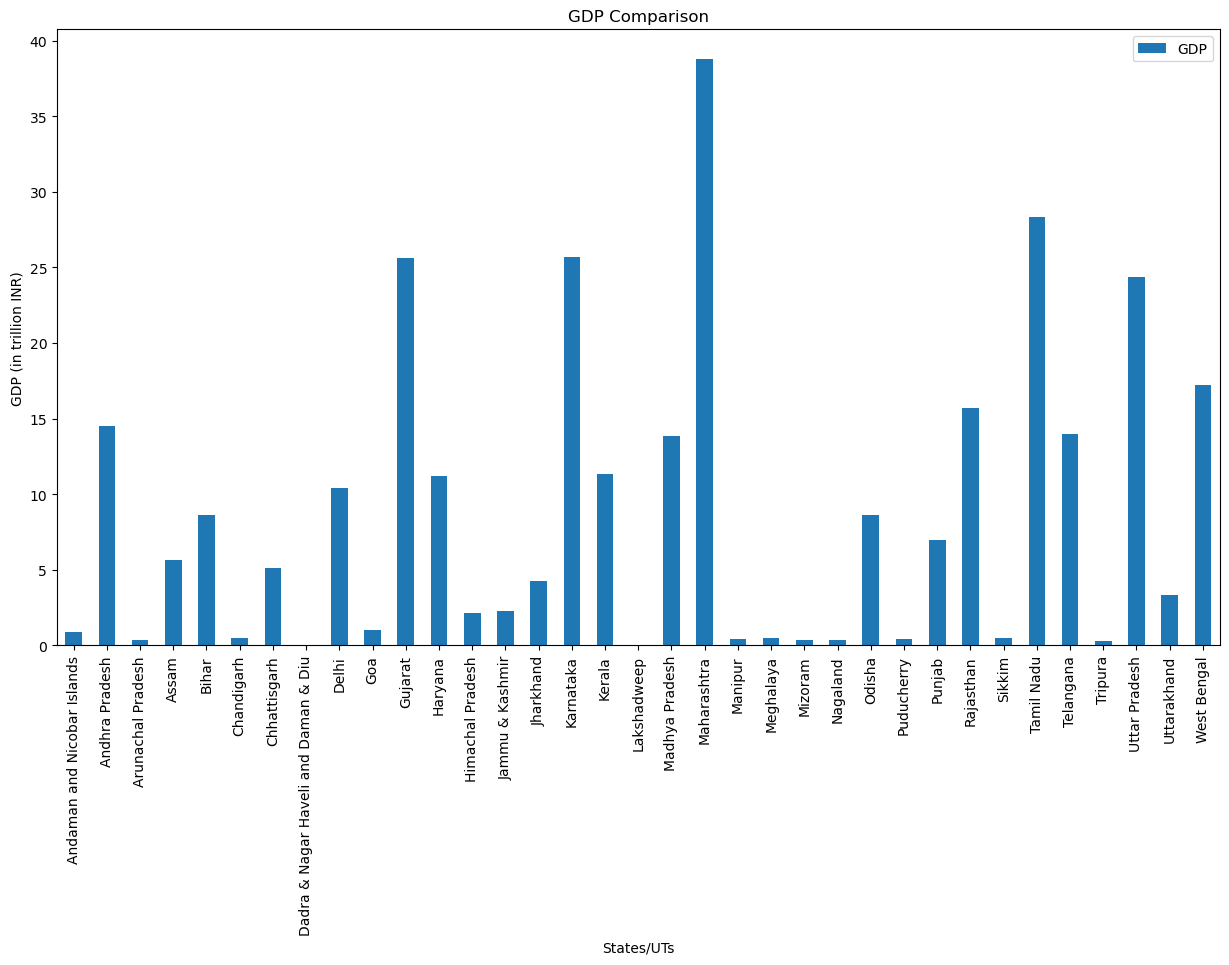

In [38]:
def gdp_analysis(data):
    data.plot(x='States/Uts', y='GDP', kind='bar', figsize=(15, 8))
    plt.title('GDP Comparison')
    plt.xlabel('States/UTs')
    plt.ylabel('GDP (in trillion INR)')
    plt.xticks(rotation=90)
    plt.show()

gdp_analysis(data)

# Per Capita GDP Analysis

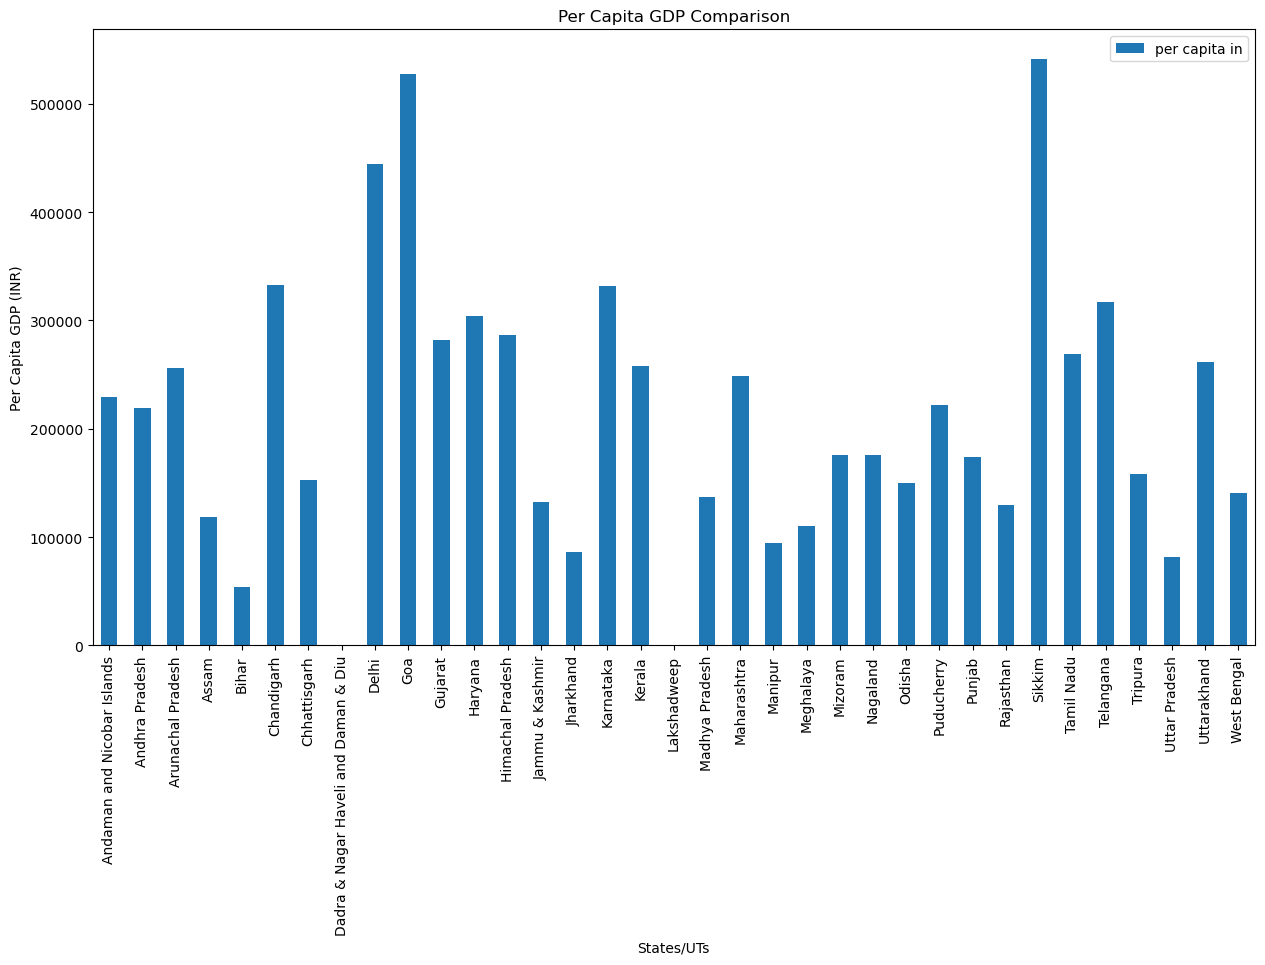

In [39]:
def per_capita_gdp_analysis(data):
    data.plot(x='States/Uts', y='per capita in', kind='bar', figsize=(15, 8))
    plt.title('Per Capita GDP Comparison')
    plt.xlabel('States/UTs')
    plt.ylabel('Per Capita GDP (INR)')
    plt.xticks(rotation=90)
    plt.show()

per_capita_gdp_analysis(data)

# DEMOGRAPHICAL ANALYSIS

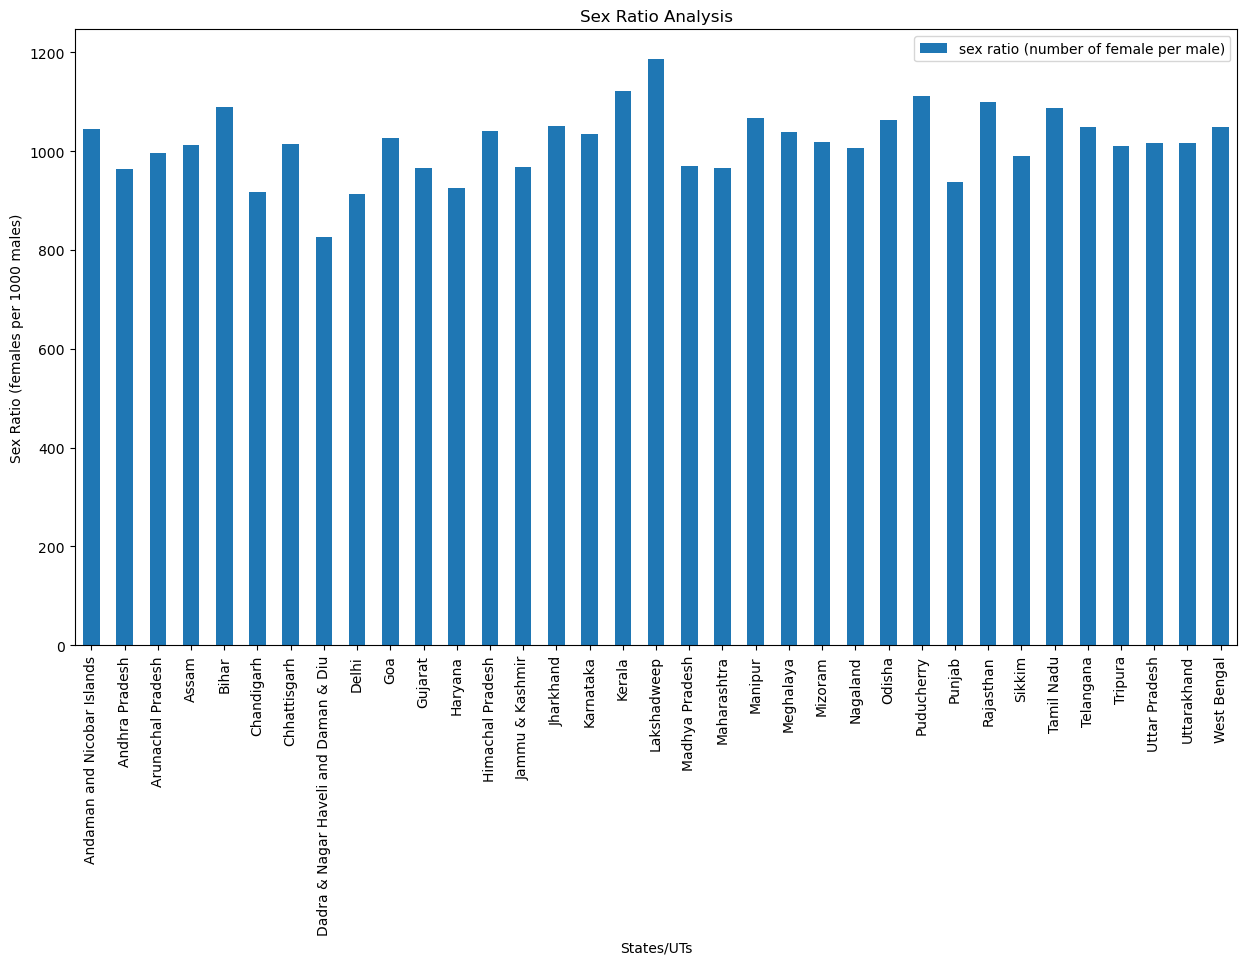

In [40]:
def sex_ratio_analysis(data):
    data.plot(x='States/Uts', y='sex ratio (number of female per male)', kind='bar', figsize=(15, 8))
    plt.title('Sex Ratio Analysis')
    plt.xlabel('States/UTs')
    plt.ylabel('Sex Ratio (females per 1000 males)')
    plt.xticks(rotation=90)
    plt.show()

sex_ratio_analysis(data)

# Religious Demographics

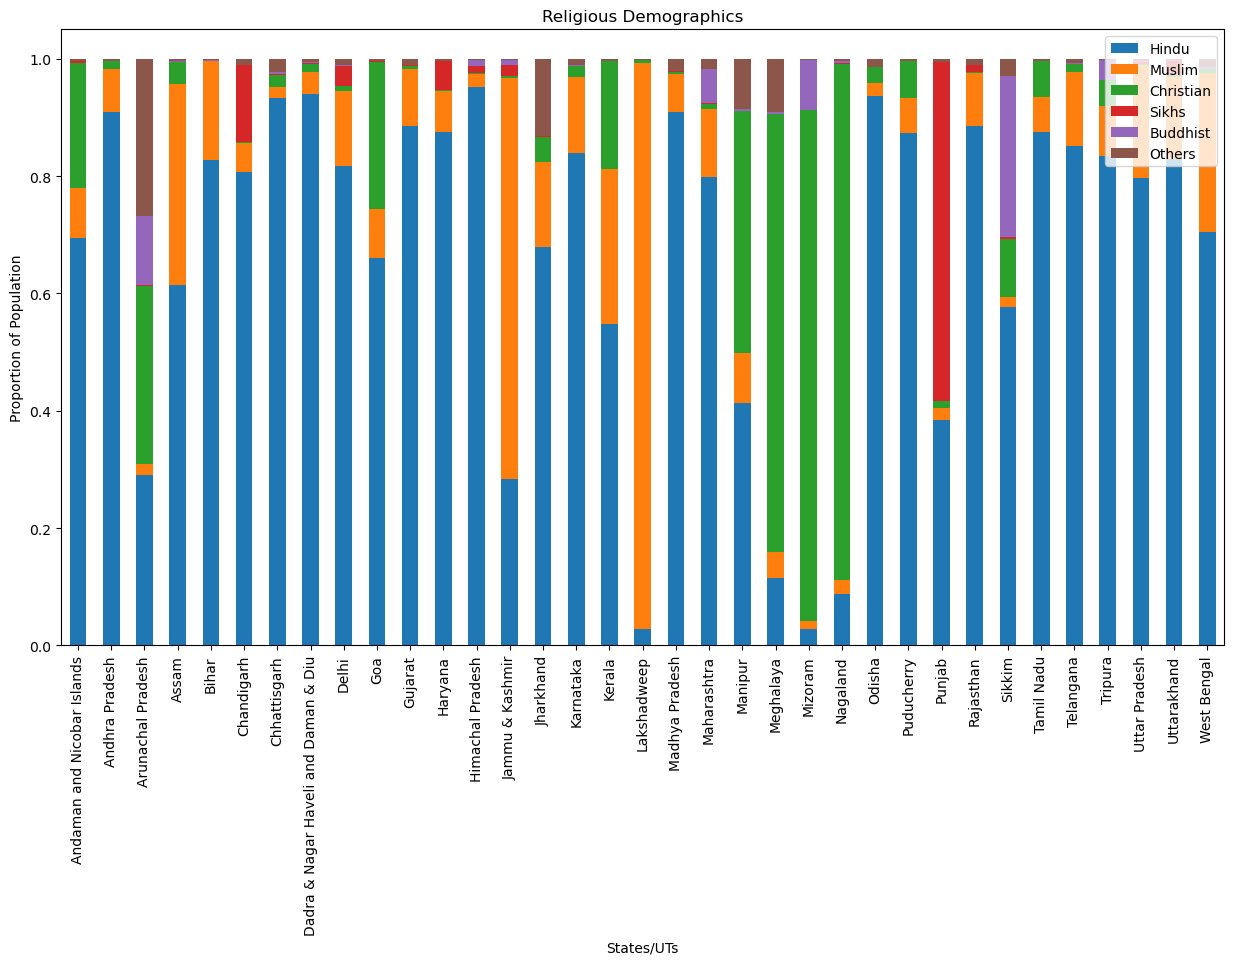

In [41]:
def religious_demographics(data):
    data.plot(x='States/Uts', y=['Hindu', 'Muslim', 'Christian', 'Sikhs', 'Buddhist', 'Others'], kind='bar', stacked=True, figsize=(15, 8))
    plt.title('Religious Demographics')
    plt.xlabel('States/UTs')
    plt.ylabel('Proportion of Population')
    plt.xticks(rotation=90)
    plt.legend(loc='upper right')
    plt.show()

religious_demographics(data)

# Majority Religion

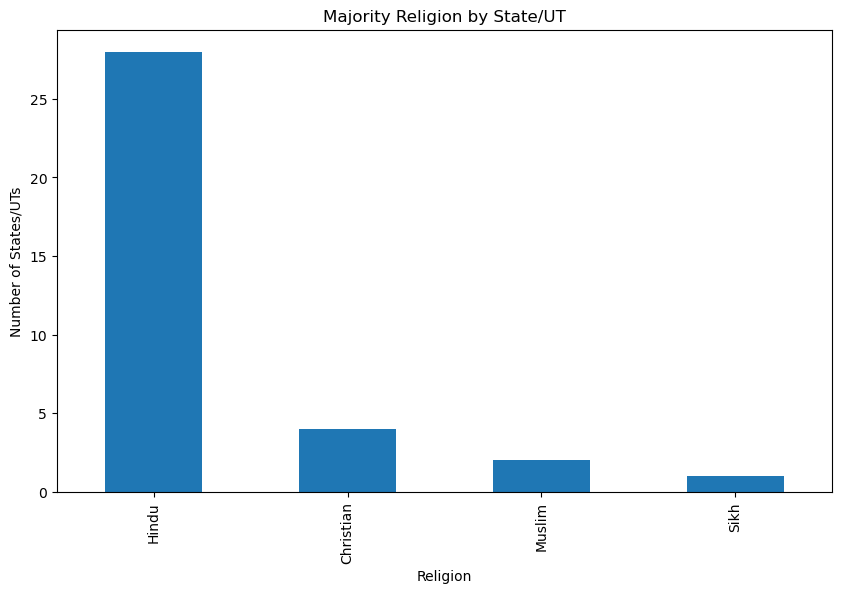

In [42]:
def majority_religion(data):
    majority = data['Majority'].value_counts()
    majority.plot(kind='bar', figsize=(10, 6))
    plt.title('Majority Religion by State/UT')
    plt.xlabel('Religion')
    plt.ylabel('Number of States/UTs')
    plt.show()

majority_religion(data)

# Geographical Analysis

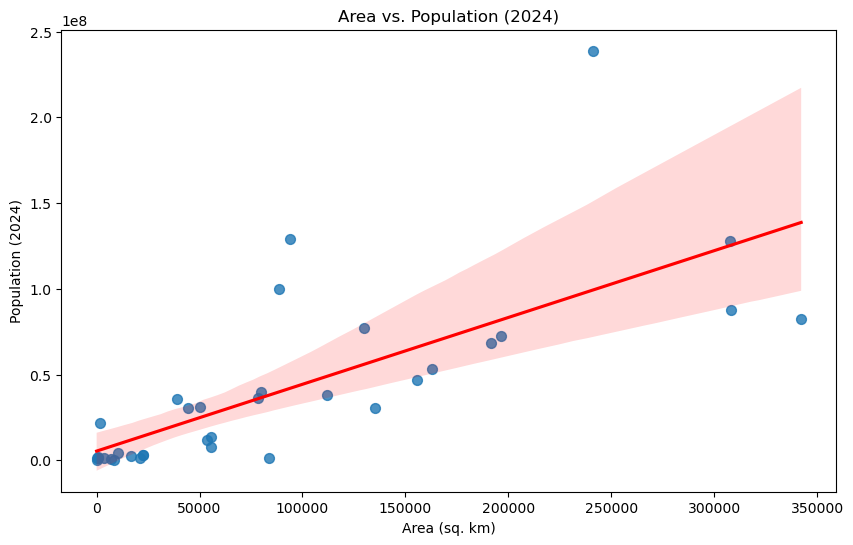

In [43]:
def area_vs_population(data):
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Area (sq. km)', y='population(2024)', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
    plt.title('Area vs. Population (2024)')
    plt.xlabel('Area (sq. km)')
    plt.ylabel('Population (2024)')
    plt.show()

area_vs_population(data)

# Area vs. GDP with Trend Line

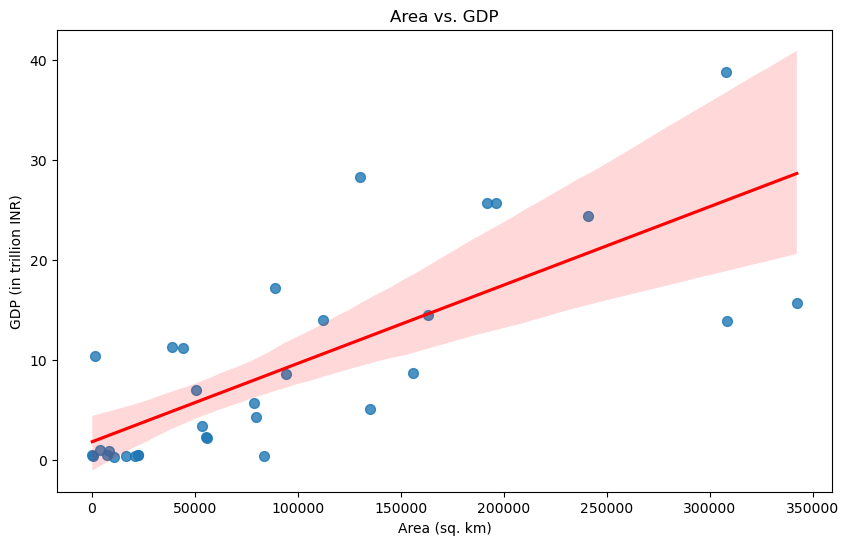

In [44]:
def area_vs_gdp(data):
    plt.figure(figsize=(10, 6))
    sns.regplot(x='Area (sq. km)', y='GDP', data=data, scatter_kws={'s':50}, line_kws={'color':'red'})
    plt.title('Area vs. GDP')
    plt.xlabel('Area (sq. km)')
    plt.ylabel('GDP (in trillion INR)')
    plt.show()

area_vs_gdp(data)

# Temporal Analysis

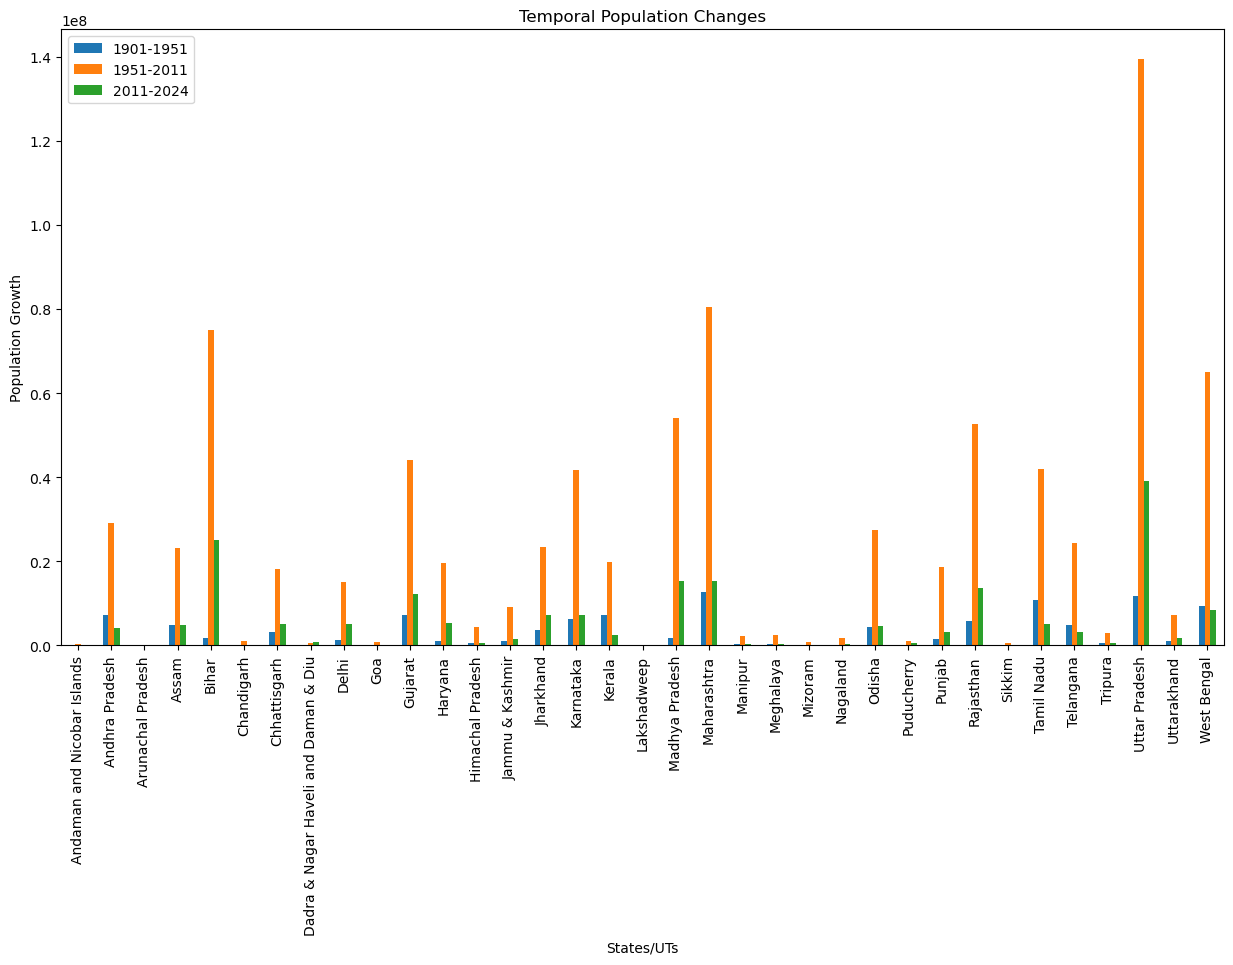

In [45]:
columns_to_convert = ['population(1901)', 'population(1951)', 'population(2011)', 'population(2023)', 'population(2024)']
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')
# Temporal Population Changes
def temporal_population_changes(data):
    data['population_growth(1901-1951)'] = data['population(1951)'] - data['population(1901)']
    data['population_growth(1951-2011)'] = data['population(2011)'] - data['population(1951)']
    data['population_growth(2011-2024)'] = data['population(2024)'] - data['population(2011)']
    
    data.plot(x='States/Uts', y=['population_growth(1901-1951)', 'population_growth(1951-2011)', 'population_growth(2011-2024)'], kind='bar', figsize=(15, 8))
    plt.title('Temporal Population Changes')
    plt.xlabel('States/UTs')
    plt.ylabel('Population Growth')
    plt.xticks(rotation=90)
    plt.legend(['1901-1951', '1951-2011', '2011-2024'])
    plt.show()

temporal_population_changes(data)

# Temporal Literacy Changes

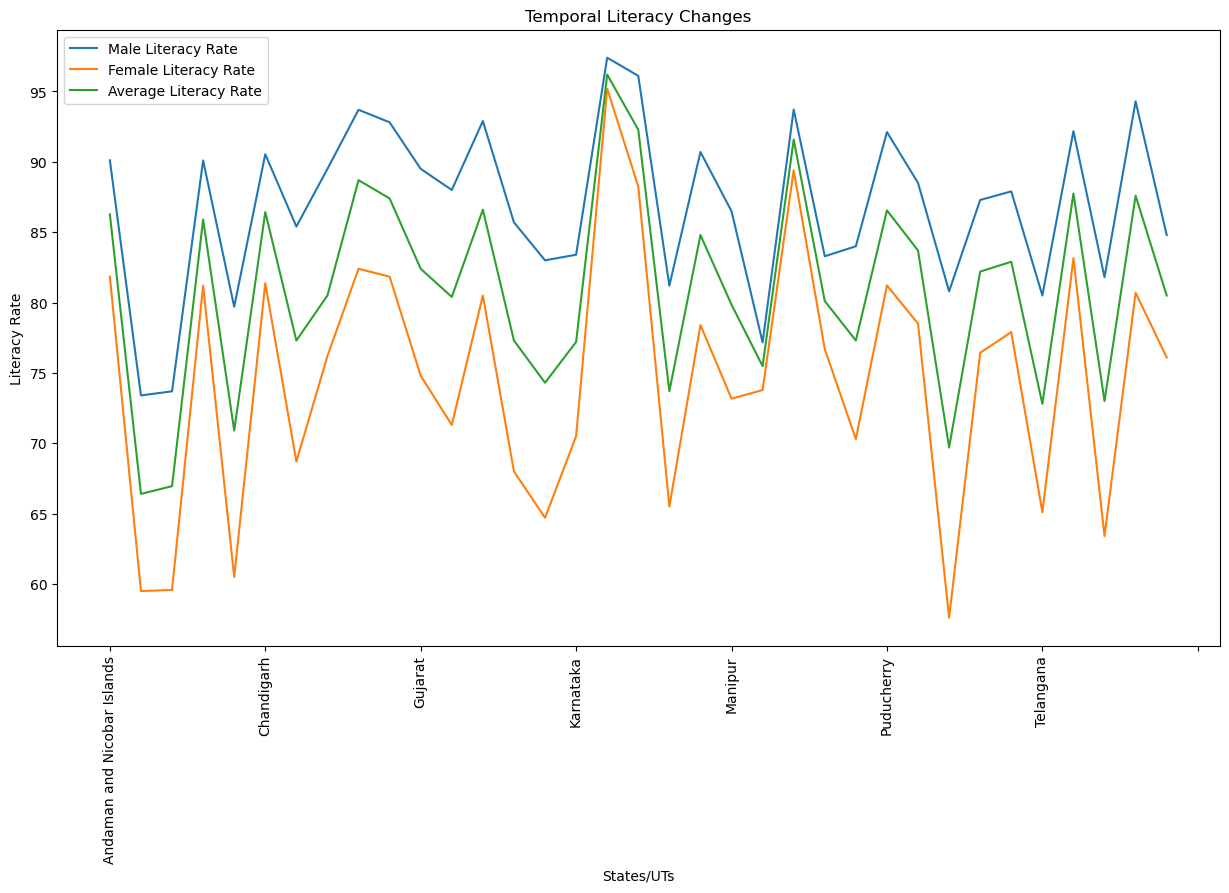

In [46]:
def temporal_literacy_changes(data):
    # Assuming columns for historical literacy rates are available, otherwise calculate based on available data
    data.plot(x='States/Uts', y=['Male(literacy rate)', 'Female (literacy rate)Average (literacy rate)', 'average (literacy rate)'], kind='line', figsize=(15, 8))
    plt.title('Temporal Literacy Changes')
    plt.xlabel('States/UTs')
    plt.ylabel('Literacy Rate')
    plt.xticks(rotation=90)
    plt.legend(['Male Literacy Rate', 'Female Literacy Rate', 'Average Literacy Rate'])
    plt.show()

temporal_literacy_changes(data)
